In [1]:
import GRU
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [2]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def inference(net, X):

    probs = net.forward(X)[-1]
    labels = np.argmax(probs, 1)
    return labels, probs

In [3]:
means = np.zeros(768)

for i in os.listdir("AllFiles"):
    f = torch.load("AllFiles/" + i)
    for n in range(len(f)):
        A = f[n].detach().numpy()
        for k in range(len(A[0])):
            means[k] += A[0][k] / 151

vars = np.zeros(768)

for i in os.listdir("AllFiles"):
    f = torch.load("AllFiles/" + i)
    for n in range(len(f)):
        A = f[n].detach().numpy()
        for k in range(len(A[0])):
            vars[k] += (A[0][k] - means[k]) ** 2
var = vars / 151
sigma = np.sqrt(var)

In [6]:
tab = []
for i in os.listdir("Train/TrainData"):
    a = torch.load("Train/TrainData/" + i)
    bit = []
    for n in range(167):
        A = a[n].detach().numpy()
        bit.append((A[0][:] - means) / np.sqrt(sigma ** 2 + 1e-5))
    bit2 = np.stack(bit)
    tab.append(bit2)
Xtrain = np.stack(tab)

taB = []
for i in os.listdir("Test/TestData"):
    a = torch.load("Test/TestData/" + i)
    bit = []
    for n in range(167):
        A = a[n].detach().numpy()
        #print("A", A)
        bit.append((A[0][:] - means) / np.sqrt(sigma ** 2 + 1e-5))
    bit2 = np.stack(bit)
    taB.append(bit2)
Xtest = np.stack(taB)

Tab = []
for i in os.listdir("Validation/ValidationData"):
    a = torch.load("Validation/ValidationData/" + i)
    bit = []
    for n in range(167):
        A = a[n].detach().numpy()
        #print("A", A)
        bit.append((A[0][:] - means) / np.sqrt(sigma ** 2 + 1e-5))
    bit2 = np.stack(bit)
    Tab.append(bit2)
Xval = np.stack(Tab)

print(Xtrain.shape, Xtest.shape, Xval.shape)



tab = []
for i in os.listdir("Train/TrainClasses"):
    f = open("Train/TrainClasses/" + i)
    f1 = f.read()
    F = f1.splitlines()
    bit = []
    for n in range(len(F)):
        bit.append(int(F[n]))
    tab.append(bit)
Ytrain = np.stack(tab)

taB = []
for i in os.listdir("Test/TestClasses"):
    f = open("Test/TestClasses/" + i)
    f1 = f.read()
    F = f1.splitlines()
    bit = []
    for n in range(len(F)):
        bit.append(int(F[n]))
    taB.append(bit)
Ytest = np.stack(taB)

Tab = []
for i in os.listdir("Validation/ValidationClasses"):
    f = open("Validation/ValidationClasses/" + i)
    f1 = f.read()
    F = f1.splitlines()
    bit = []
    for n in range(len(F)):
        bit.append(int(F[n]))
    Tab.append(bit)
Yval = np.stack(Tab)

print(Ytrain.shape, Ytest.shape, Yval.shape)

(111, 167, 768) (20, 167, 768) (20, 167, 768)
(111, 167) (20, 167) (20, 167)


cuda
0
1
2
3
4
5
6
7
8
9



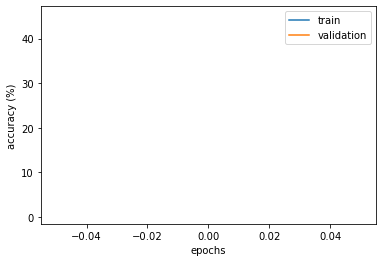

0.0	0.0	7.0	0.0	1.0	4.0	0.0	0.0	0.0	8.0	0.0	0.0	6.0	0.0	1.0	4.0	0.0	0.0	0.0	8.0	0.0	0.0	6.0	0.0	1.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	5.0	0.0	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	4.0	0.0	0.0	1.0	0.0	0.0	0.0	5.0	0.0	0.0	4.0	0.0	1.0	3.0	0.0	0.0	0.0	7.0	0.0	0.0	2.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	1.0	4.0	0.0	0.0	0.0	4.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



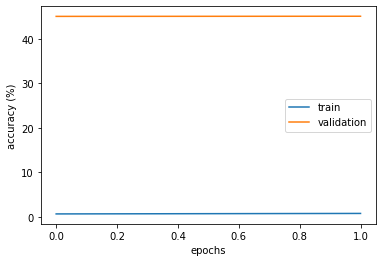

0.0	0.0	8.0	0.0	1.0	3.0	0.0	0.0	0.0	8.0	0.0	0.0	7.0	0.0	1.0	3.0	0.0	0.0	0.0	8.0	0.0	0.0	6.0	0.0	1.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	5.0	0.0	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	4.0	0.0	0.0	1.0	0.0	0.0	0.0	5.0	0.0	0.0	5.0	0.0	1.0	2.0	0.0	0.0	0.0	7.0	0.0	0.0	2.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	4.0	0.0	1.0	3.0	0.0	0.0	0.0	4.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



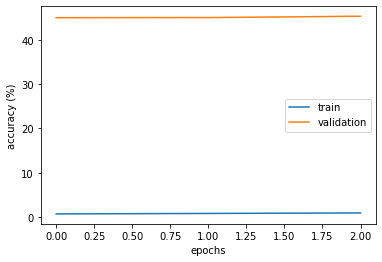

0.0	0.0	7.0	0.0	0.0	6.0	0.0	0.0	0.0	7.0	0.0	0.0	6.0	0.0	0.0	6.0	0.0	0.0	0.0	7.0	0.0	0.0	6.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	5.0	0.0	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	4.0	0.0	0.0	1.0	0.0	0.0	0.0	5.0	0.0	0.0	4.0	0.0	0.0	4.0	0.0	0.0	0.0	7.0	0.0	0.0	2.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	6.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



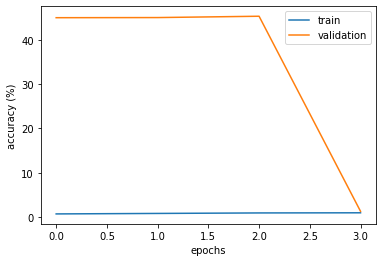

0.0	0.0	5.0	0.0	3.0	6.0	0.0	0.0	0.0	6.0	0.0	0.0	5.0	0.0	2.0	6.0	0.0	0.0	0.0	6.0	0.0	0.0	4.0	0.0	1.0	4.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	1.0	2.0	0.0	0.0	0.0	1.0	0.0	0.0	2.0	0.0	0.0	3.0	0.0	0.0	0.0	3.0	0.0	0.0	3.0	0.0	1.0	2.0	0.0	0.0	0.0	4.0	0.0	0.0	3.0	0.0	2.0	4.0	0.0	0.0	0.0	6.0	0.0	0.0	1.0	0.0	1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	2.0	6.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



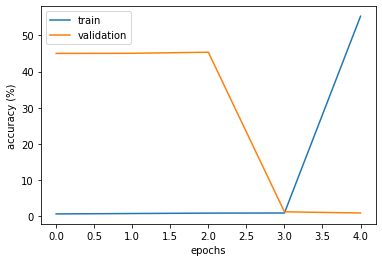

0.0	0.0	5.0	0.0	6.0	3.0	0.0	0.0	0.0	6.0	0.0	0.0	5.0	0.0	5.0	3.0	0.0	0.0	0.0	6.0	0.0	0.0	4.0	0.0	2.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	2.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	2.0	0.0	1.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	3.0	0.0	3.0	0.0	0.0	0.0	0.0	4.0	0.0	0.0	3.0	0.0	4.0	2.0	0.0	0.0	0.0	6.0	0.0	0.0	1.0	0.0	1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	5.0	3.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



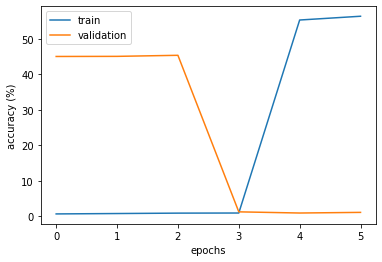

0.0	0.0	6.0	0.0	6.0	2.0	0.0	0.0	0.0	6.0	0.0	0.0	5.0	0.0	6.0	2.0	0.0	0.0	0.0	6.0	0.0	0.0	5.0	0.0	2.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	4.0	0.0	2.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	2.0	0.0	2.0	1.0	0.0	0.0	0.0	3.0	0.0	0.0	3.0	0.0	3.0	0.0	0.0	0.0	0.0	4.0	0.0	0.0	3.0	0.0	4.0	2.0	0.0	0.0	0.0	6.0	0.0	0.0	2.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	6.0	2.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



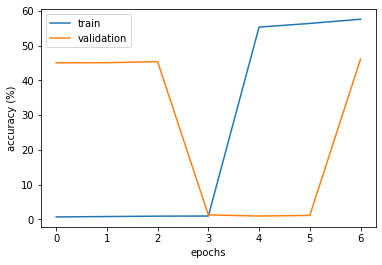

1.0	0.0	4.0	0.0	4.0	4.0	0.0	0.0	0.0	7.0	1.0	0.0	3.0	0.0	4.0	4.0	0.0	0.0	0.0	7.0	1.0	0.0	3.0	0.0	2.0	3.0	0.0	0.0	0.0	0.0	1.0	0.0	2.0	0.0	2.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	2.0	0.0	1.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	3.0	0.0	1.0	1.0	0.0	0.0	0.0	5.0	0.0	0.0	3.0	0.0	2.0	3.0	0.0	0.0	0.0	7.0	0.0	0.0	1.0	0.0	1.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	3.0	4.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



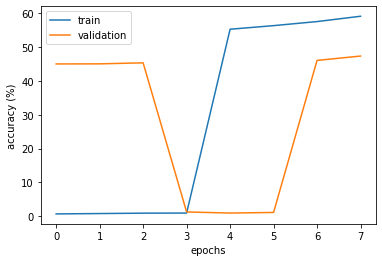

1.0	0.0	3.0	0.0	4.0	5.0	0.0	0.0	0.0	7.0	1.0	0.0	3.0	0.0	3.0	5.0	0.0	0.0	0.0	7.0	1.0	0.0	2.0	0.0	3.0	3.0	0.0	0.0	0.0	0.0	1.0	0.0	1.0	0.0	3.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	2.0	0.0	1.0	2.0	0.0	0.0	0.0	3.0	0.0	0.0	3.0	0.0	0.0	2.0	0.0	0.0	0.0	5.0	0.0	0.0	3.0	0.0	1.0	4.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	2.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	0.0	2.0	5.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



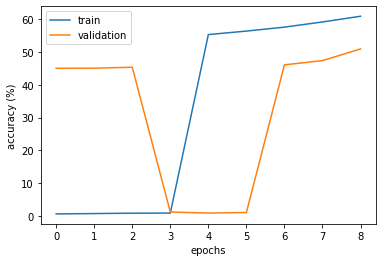

5.0	0.0	1.0	0.0	3.0	4.0	0.0	0.0	0.0	7.0	5.0	0.0	1.0	0.0	2.0	4.0	0.0	0.0	0.0	7.0	4.0	0.0	0.0	0.0	3.0	2.0	0.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	3.0	1.0	0.0	0.0	0.0	1.0	3.0	0.0	0.0	0.0	1.0	1.0	0.0	0.0	0.0	3.0	2.0	0.0	1.0	0.0	0.0	2.0	0.0	0.0	0.0	5.0	4.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	0.0	7.0	1.0	0.0	0.0	0.0	2.0	0.0	0.0	0.0	0.0	0.0	4.0	0.0	0.0	0.0	1.0	4.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



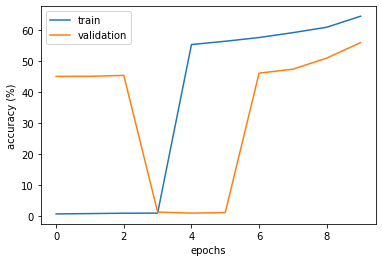

7.0	0.0	2.0	0.0	1.0	3.0	0.0	0.0	0.0	7.0	6.0	0.0	2.0	0.0	1.0	3.0	0.0	0.0	0.0	7.0	5.0	0.0	1.0	0.0	1.0	2.0	0.0	0.0	0.0	0.0	3.0	0.0	1.0	0.0	1.0	1.0	0.0	0.0	0.0	1.0	3.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	3.0	2.0	0.0	1.0	0.0	0.0	2.0	0.0	0.0	0.0	5.0	4.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	0.0	7.0	2.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	5.0	0.0	1.0	0.0	0.0	3.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



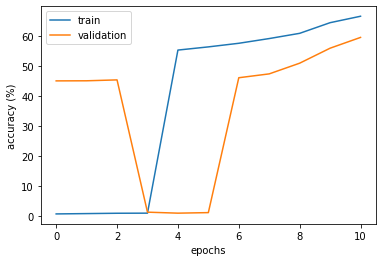

10.0	0.0	2.0	0.0	1.0	0.0	0.0	1.0	0.0	6.0	9.0	0.0	2.0	0.0	1.0	0.0	0.0	1.0	0.0	6.0	7.0	0.0	1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	4.0	0.0	1.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	5.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	3.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	5.0	7.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	6.0	2.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	1.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



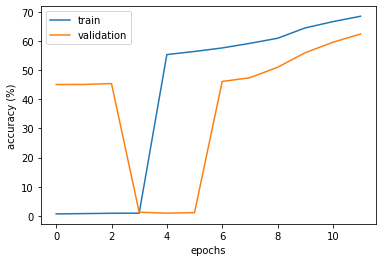

16.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	6.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0	11.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	3.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



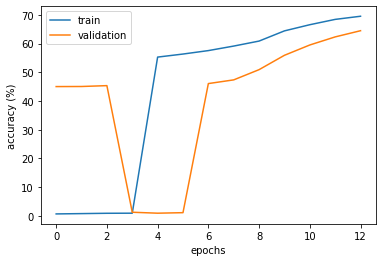

17.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	2.0	16.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	2.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	2.0	12.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	2.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



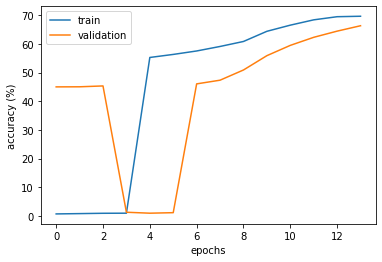

18.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	17.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	13.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	2.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	11.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



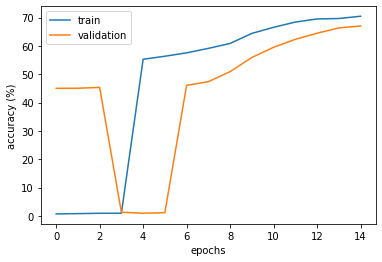

19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	18.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	14.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



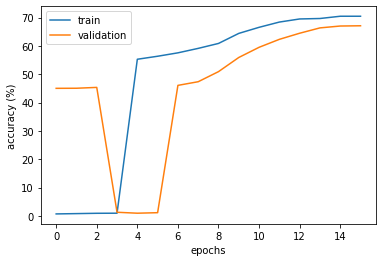

19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	18.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	14.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



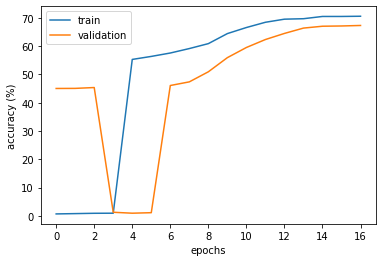

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



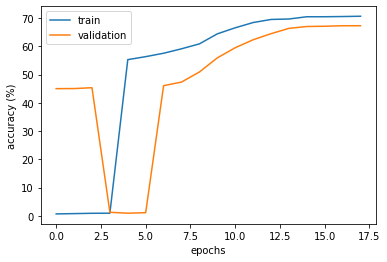

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



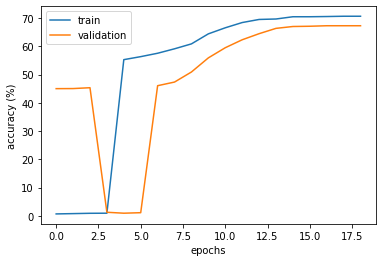

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



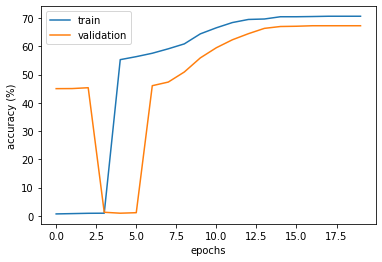

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



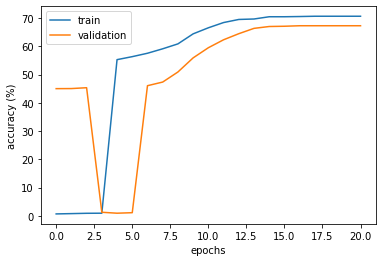

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



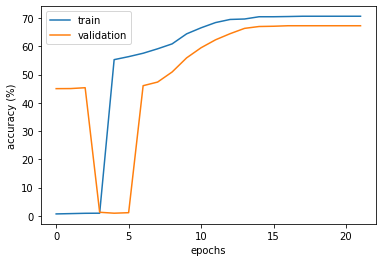

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



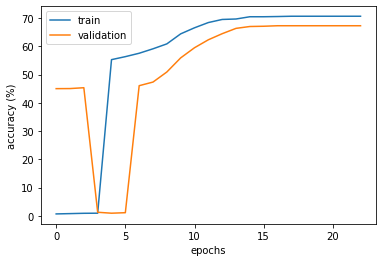

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



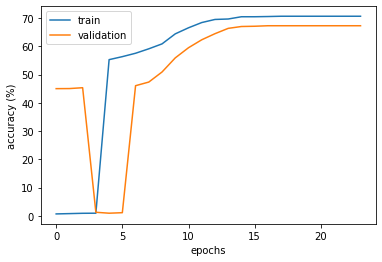

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



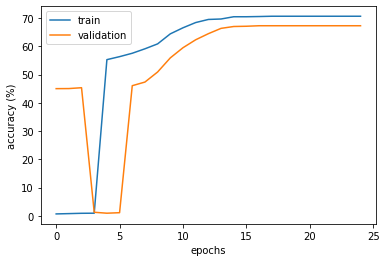

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



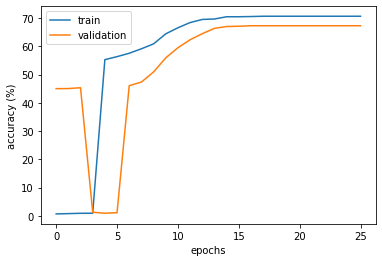

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



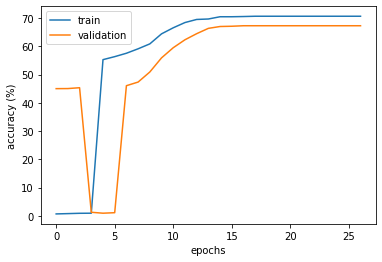

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



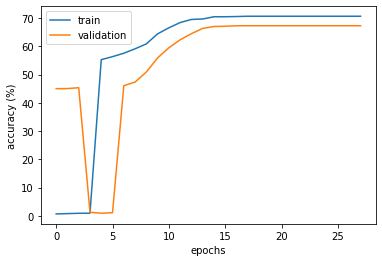

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



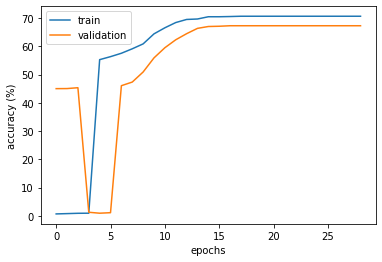

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



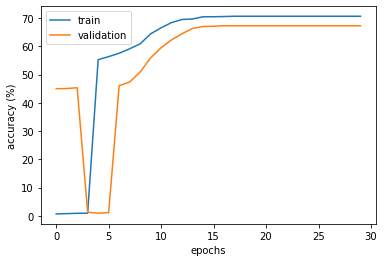

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



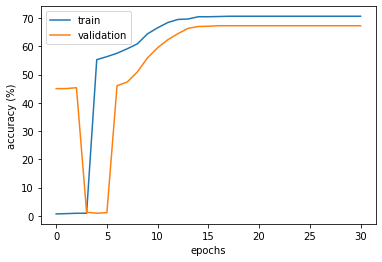

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



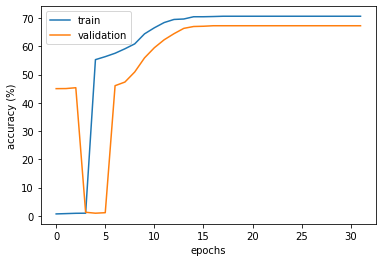

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



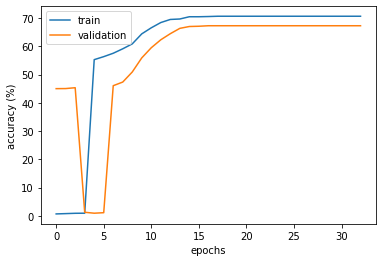

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



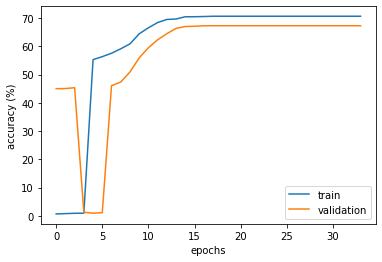

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



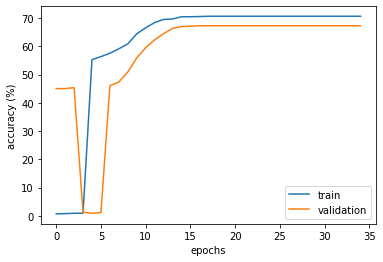

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



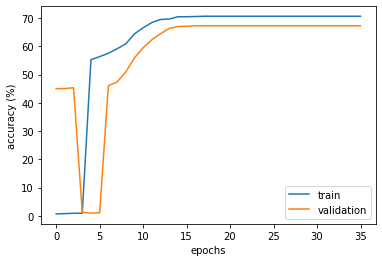

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



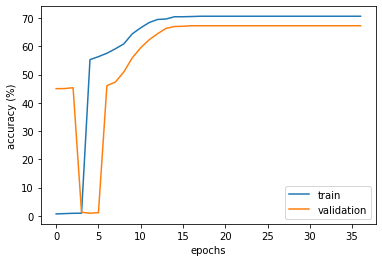

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



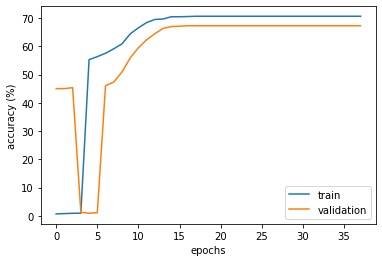

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



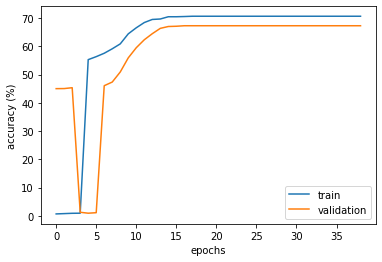

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



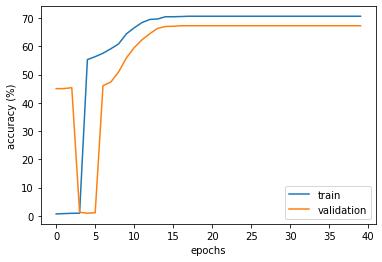

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



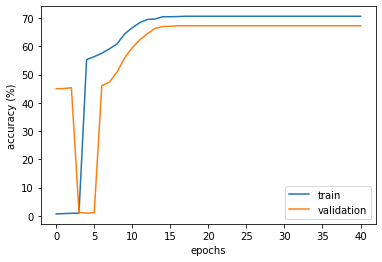

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



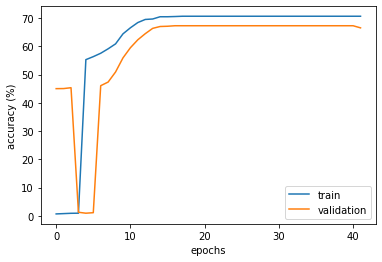

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



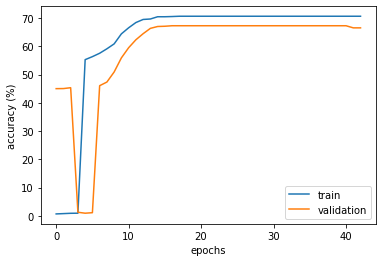

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



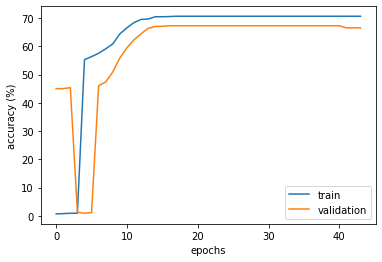

20.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	19.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	10.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	15.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



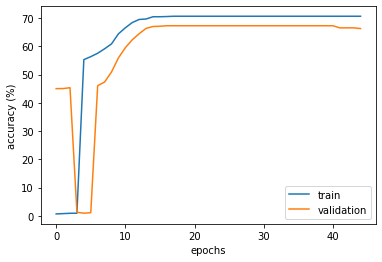

19.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	18.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	14.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



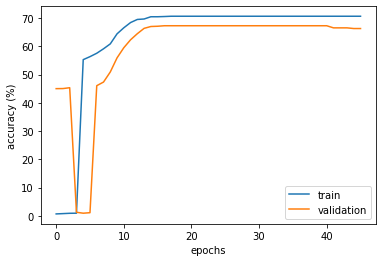

19.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	18.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	14.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



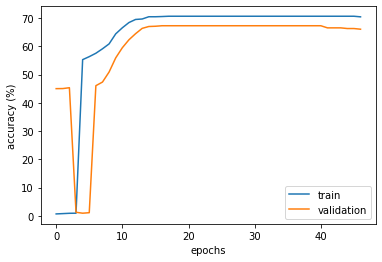

19.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	18.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	14.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



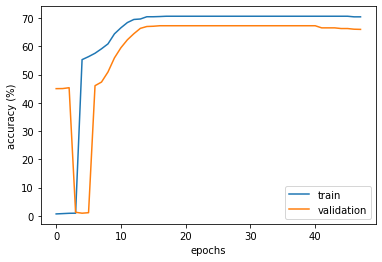

19.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	18.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	9.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	14.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	12.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



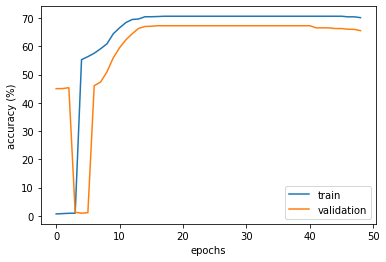

18.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	17.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	13.0	0.0	1.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	11.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0
1
2
3
4
5
6
7
8
9



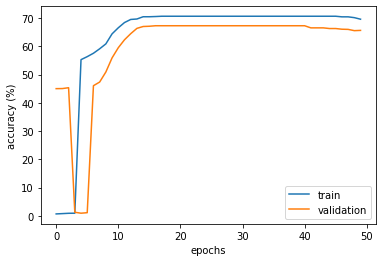

17.0	0.0	1.0	0.0	0.0	1.0	1.0	0.0	0.0	0.0	16.0	0.0	1.0	0.0	0.0	1.0	1.0	0.0	0.0	0.0	9.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	8.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	7.0	0.0	1.0	0.0	0.0	1.0	1.0	0.0	0.0	0.0	12.0	0.0	1.0	0.0	0.0	1.0	1.0	0.0	0.0	0.0	3.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	11.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

In [8]:
"""TRAINING"""

model = GRU.RNN([768, 768, 10], "gru")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
#model.to(device)

plt.ion()

train_accs = []
val_accs = []
for epoch in range(50):
    model.train(Xtrain, Ytrain, lr=1e-6, lambda_=1e-7, momentum=0.99,
              steps=10, batch=10)
    predictions = inference(model, Xtrain)[0]
    train_acc = (predictions==Ytrain).astype(int)
    train_acc = train_acc.mean()
    train_acc = train_acc.mean()
    print()
    #predictions = inference(net, Xtest)[0]
    #test_acc = (predictions==Ytest).astype(int)
    #test_acc = test_acc.mean()
    predictions = inference(model, Xval)[0]
    val_acc = (predictions==Yval).astype(int)
    val_acc = val_acc.mean()
    val_acc = val_acc.mean()
    train_accs.append(train_acc * 100)
    val_accs.append(val_acc * 100)
    plt.clf()
    plt.plot(train_accs)
    plt.plot(val_accs)
    plt.legend(["train", "validation"])
    plt.xlabel("epochs")
    plt.ylabel("accuracy (%)")
    plt.pause(0.05)
    
    confusion_matrix = np.zeros((10, 10))
    for p, y in zip(predictions, Ytest):
        confusion_matrix[y, p] += 1
    for i in range(10):
        for j in range(10):
            print(confusion_matrix[i, j], end="\t")
    